In [40]:
#eda
import pandas as pd
import statsmodels.api as sm
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt 
import sweetviz as sv

# ml 
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score

# otimização de hiperparametros

import optuna 

In [41]:
df_obesiddade = pd.read_csv('./data.csv')
df_obesiddade.head(5)

,Genero_Masculino,Idade,Historico_Familiar_Sobrepeso,Consumo_Alta_Caloria_Com_Frequencia,Consumo_Vegetais_Com_Frequencia,Refeicoes_Dia,Consumo_Alimentos_entre_Refeicoes,Fumante,Consumo_Agua,Monitora_Calorias_Ingeridas,Nivel_Atividade_Fisica,Nivel_Uso_Tela,Consumo_Alcool,Transporte_Automovel,Transporte_Bicicleta,Transporte_Motocicleta,Transporte_Publico,Transporte_Caminhada,Obeso
0,0,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,1,0,0
1,0,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,1,0,0
2,1,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,1,0,0
3,1,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,0,1,0
4,1,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,0,1,0,0


In [42]:
df_obesiddade.tail(5)

,Genero_Masculino,Idade,Historico_Familiar_Sobrepeso,Consumo_Alta_Caloria_Com_Frequencia,Consumo_Vegetais_Com_Frequencia,Refeicoes_Dia,Consumo_Alimentos_entre_Refeicoes,Fumante,Consumo_Agua,Monitora_Calorias_Ingeridas,Nivel_Atividade_Fisica,Nivel_Uso_Tela,Consumo_Alcool,Transporte_Automovel,Transporte_Bicicleta,Transporte_Motocicleta,Transporte_Publico,Transporte_Caminhada,Obeso
2106,0,20.976842,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,0,0,0,1,0,1
2107,0,21.982942,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,0,0,0,1,0,1
2108,0,22.524036,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,0,0,0,1,0,1
2109,0,24.361936,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,0,0,0,1,0,1
2110,0,23.664709,1,1,3.0,3.0,1,0,2.863513,0,1.026452,0.714137,1,0,0,0,1,0,1


In [43]:
df_obesiddade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Genero_Masculino                     2111 non-null   int64  
 1   Idade                                2111 non-null   float64
 2   Historico_Familiar_Sobrepeso         2111 non-null   int64  
 3   Consumo_Alta_Caloria_Com_Frequencia  2111 non-null   int64  
 4   Consumo_Vegetais_Com_Frequencia      2111 non-null   float64
 5   Refeicoes_Dia                        2111 non-null   float64
 6   Consumo_Alimentos_entre_Refeicoes    2111 non-null   int64  
 7   Fumante                              2111 non-null   int64  
 8   Consumo_Agua                         2111 non-null   float64
 9   Monitora_Calorias_Ingeridas          2111 non-null   int64  
 10  Nivel_Atividade_Fisica               2111 non-null   float64
 11  Nivel_Uso_Tela                

In [44]:
# converter inteiro
lista_col = ['Idade', 'Consumo_Vegetais_Com_Frequencia',
'Refeicoes_Dia', 'Consumo_Agua', 'Nivel_Atividade_Fisica','Nivel_Uso_Tela']

df_obesiddade[lista_col] = df_obesiddade[lista_col].astype(int)

In [45]:
# detectar valores auzentes
df_obesiddade.isna().sum()

Genero_Masculino                       0
Idade                                  0
Historico_Familiar_Sobrepeso           0
Consumo_Alta_Caloria_Com_Frequencia    0
Consumo_Vegetais_Com_Frequencia        0
Refeicoes_Dia                          0
Consumo_Alimentos_entre_Refeicoes      0
Fumante                                0
Consumo_Agua                           0
Monitora_Calorias_Ingeridas            0
Nivel_Atividade_Fisica                 0
Nivel_Uso_Tela                         0
Consumo_Alcool                         0
Transporte_Automovel                   0
Transporte_Bicicleta                   0
Transporte_Motocicleta                 0
Transporte_Publico                     0
Transporte_Caminhada                   0
Obeso                                  0
dtype: int64

In [46]:
#EDA 
px.bar(df_obesiddade.value_counts('Obeso'))

In [47]:
px.bar(df_obesiddade.value_counts('Obeso') / len(df_obesiddade) * 100)

In [48]:
# univariada
px.histogram(df_obesiddade, x='Idade')

In [49]:
px.box(df_obesiddade, y='Idade')

In [50]:
px.bar(df_obesiddade.value_counts('Genero_Masculino') / len(df_obesiddade)*100)

In [51]:
px.bar(df_obesiddade.value_counts('Historico_Familiar_Sobrepeso') / len(df_obesiddade)*100)

In [52]:
px.bar(df_obesiddade.value_counts('Nivel_Atividade_Fisica') / len(df_obesiddade)*100)

In [53]:
px.bar(df_obesiddade.value_counts('Nivel_Uso_Tela') / len(df_obesiddade)*100)

In [54]:
df_obesiddade['Idade'].describe()

count    2111.000000
mean       23.972525
std         6.308664
min        14.000000
25%        19.000000
50%        22.000000
75%        26.000000
max        61.000000
Name: Idade, dtype: float64

In [55]:
# bucketing idade 
bins = [10, 20, 30, 40, 50, 60, 70]
bins_ordinal = [0, 1, 2 ,3 ,4, 5]
labels_faixa_etaria = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70']
df_obesiddade['Faixa_Etaria_Strng'] = pd.cut(x= df_obesiddade['Idade'], bins=bins, labels=labels_faixa_etaria,
include_lowest=True)
df_obesiddade['Faixa_Etaria'] = pd.cut(x= df_obesiddade['Idade'], bins=bins, labels=bins_ordinal,
include_lowest=True)


In [56]:
df_obesiddade

,Genero_Masculino,Idade,Historico_Familiar_Sobrepeso,Consumo_Alta_Caloria_Com_Frequencia,Consumo_Vegetais_Com_Frequencia,Refeicoes_Dia,Consumo_Alimentos_entre_Refeicoes,Fumante,Consumo_Agua,Monitora_Calorias_Ingeridas,...,Nivel_Uso_Tela,Consumo_Alcool,Transporte_Automovel,Transporte_Bicicleta,Transporte_Motocicleta,Transporte_Publico,Transporte_Caminhada,Obeso,Faixa_Etaria_Strng,Faixa_Etaria
0,0,21,1,0,2,3,1,0,2,0,...,1,0,0,0,0,1,0,0,20-30,1
1,0,21,1,0,3,3,1,1,3,1,...,0,1,0,0,0,1,0,0,20-30,1
2,1,23,1,0,2,3,1,0,2,0,...,1,2,0,0,0,1,0,0,20-30,1
3,1,27,0,0,3,3,1,0,2,0,...,0,2,0,0,0,0,1,0,20-30,1
4,1,22,0,0,2,1,1,0,2,0,...,0,1,0,0,0,1,0,0,20-30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20,1,1,3,3,1,0,1,0,...,0,1,0,0,0,1,0,1,10-20,0
2107,0,21,1,1,3,3,1,0,2,0,...,0,1,0,0,0,1,0,1,20-30,1
2108,0,22,1,1,3,3,1,0,2,0,...,0,1,0,0,0,1,0,1,20-30,1
2109,0,24,1,1,3,3,1,0,2,0,...,0,1,0,0,0,1,0,1,20-30,1


In [57]:
tabela_contingencia_faixa_etaria = sm.stats.Table.from_data(df_obesiddade[['Obeso', 'Faixa_Etaria_Strng']])

In [58]:
tabela_contingencia_faixa_etaria.table_orig

Faixa_Etaria_Strng,10-20,20-30,30-40,40-50,50-60,60-70
Obeso,,,,,,
0,498,489,131,13,7,1
1,176,649,127,19,1,0


In [59]:
# teste de chi-square
print(tabela_contingencia_faixa_etaria.test_nominal_association())

df          5
pvalue      0.0
statistic   170.1116865347508


In [60]:
# P_value < 0.05  rejeitamos H0, portanto as variáveis não são independentes


In [61]:
sv_obsidade_report = sv.analyze(df_obesiddade, target_feat='Obeso')

                                             |          | [  0%]   00:00 -> (? left)


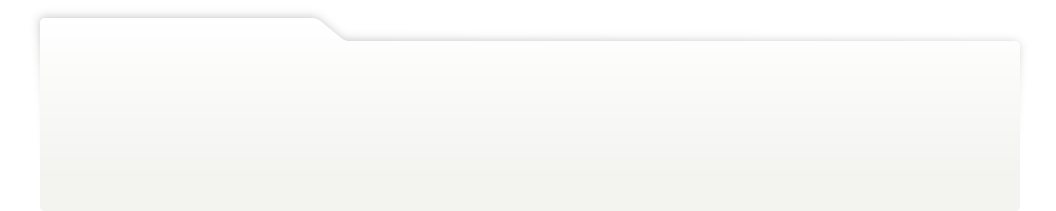
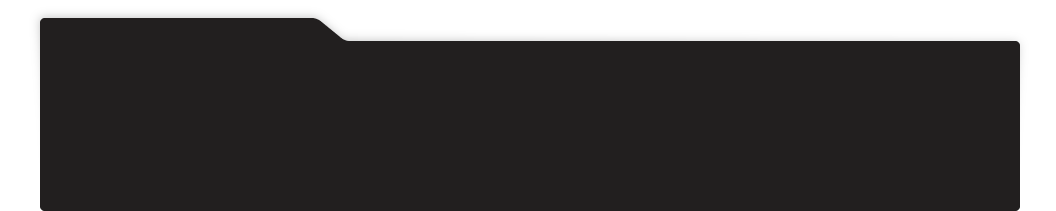
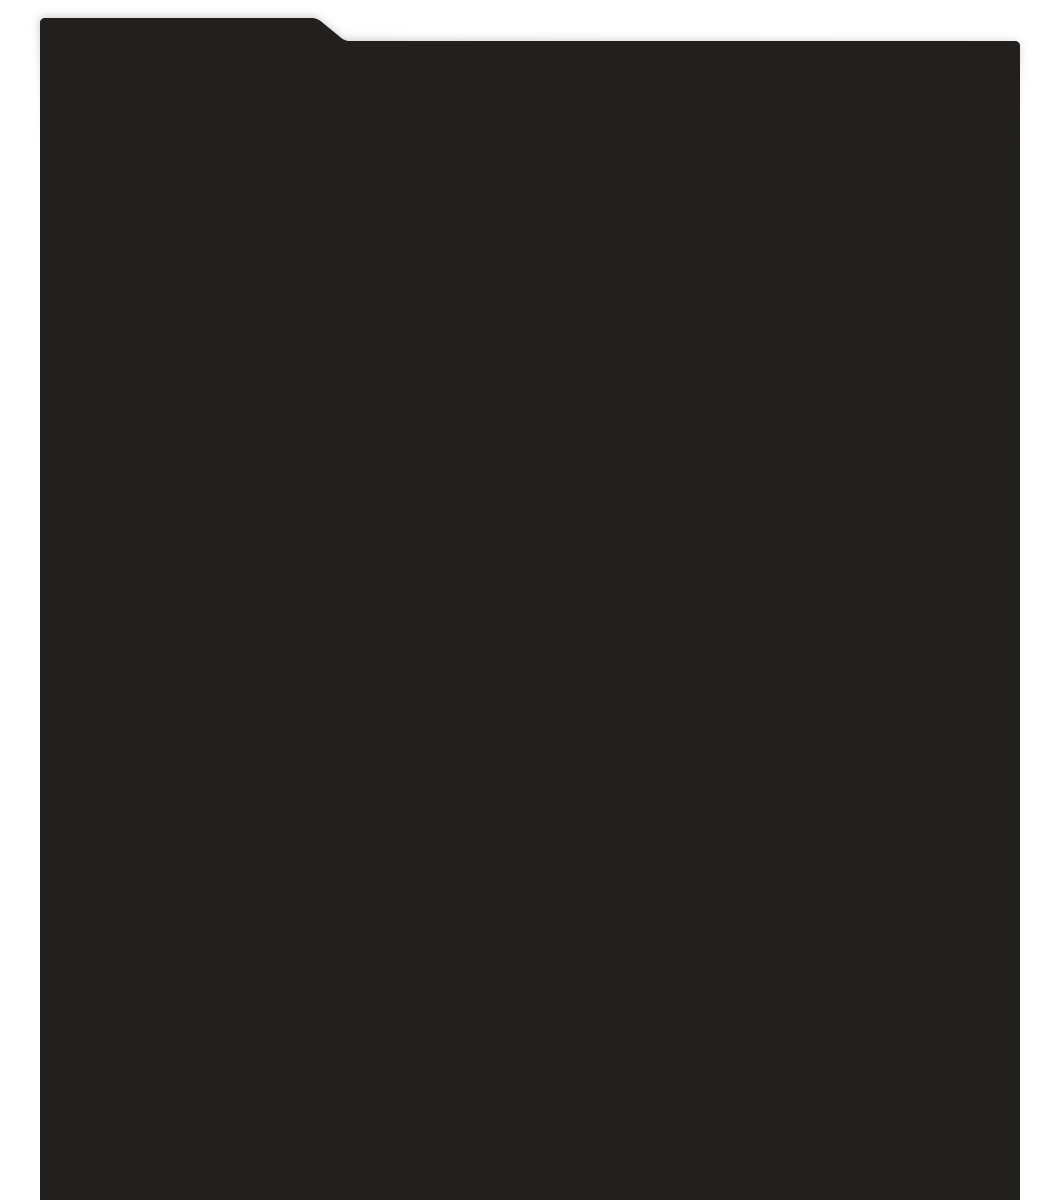
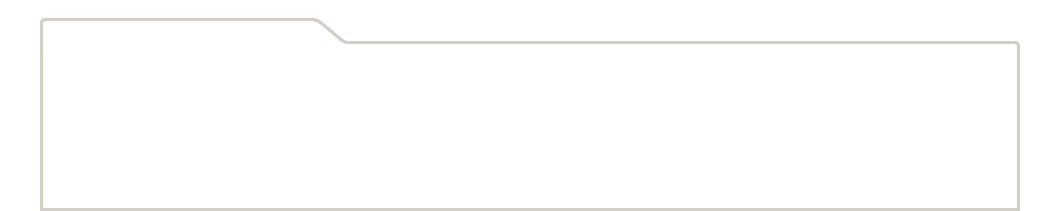
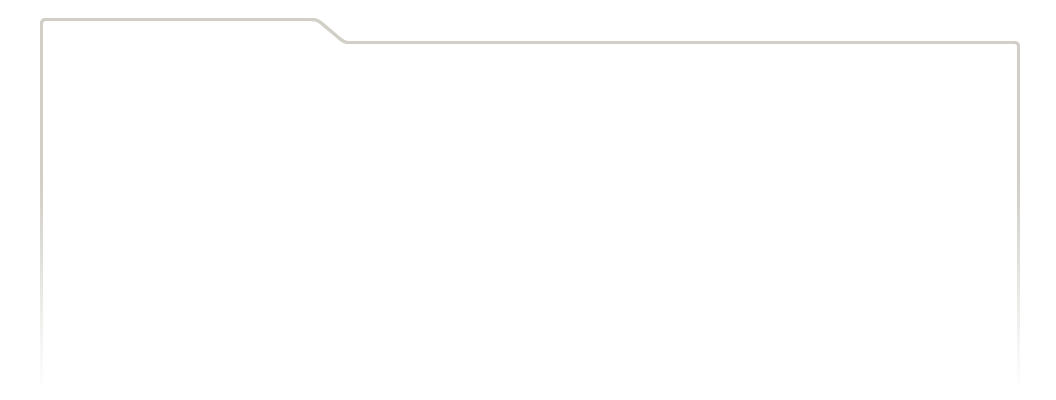
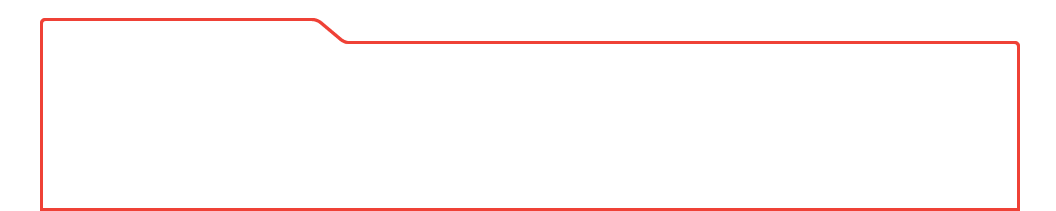
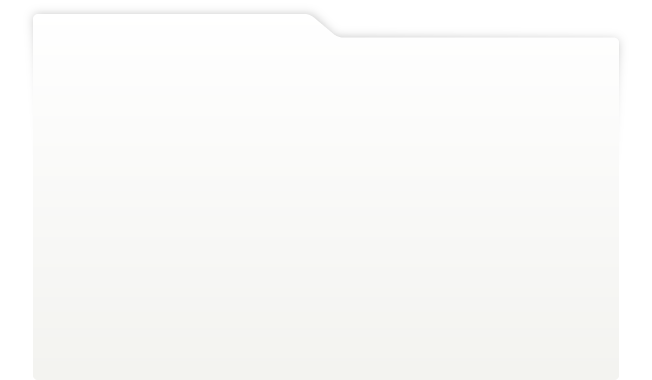
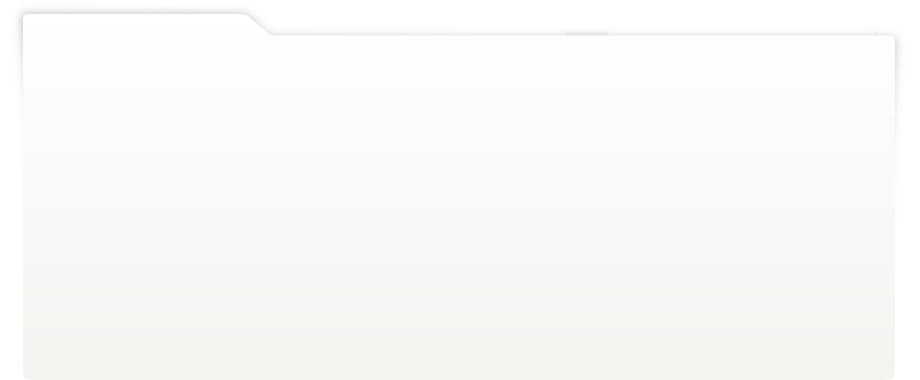
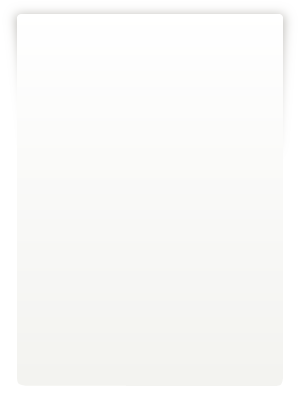
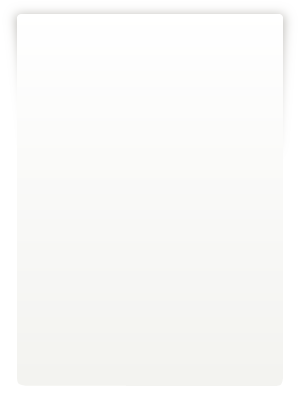
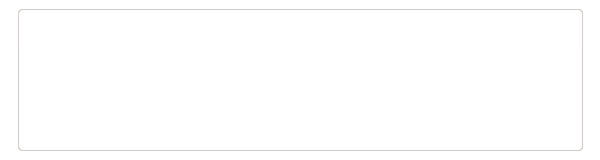
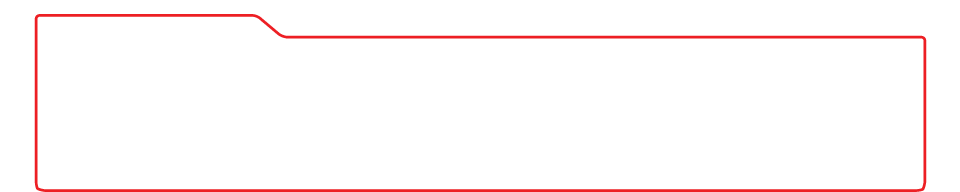
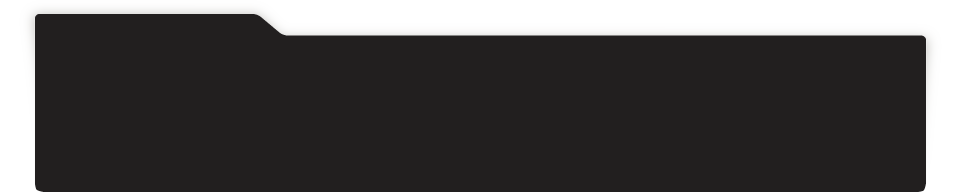
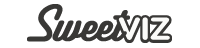
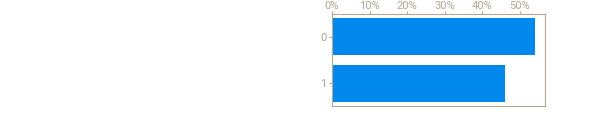
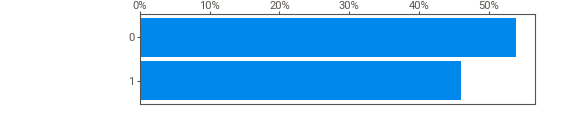
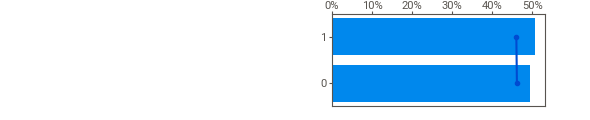
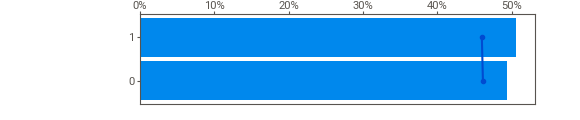
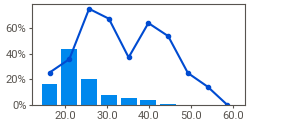
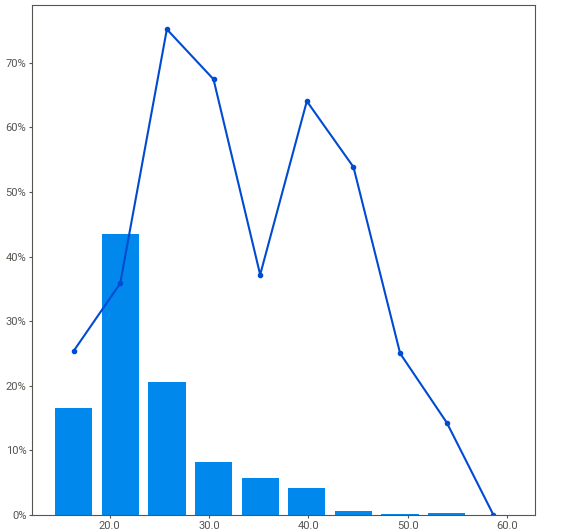
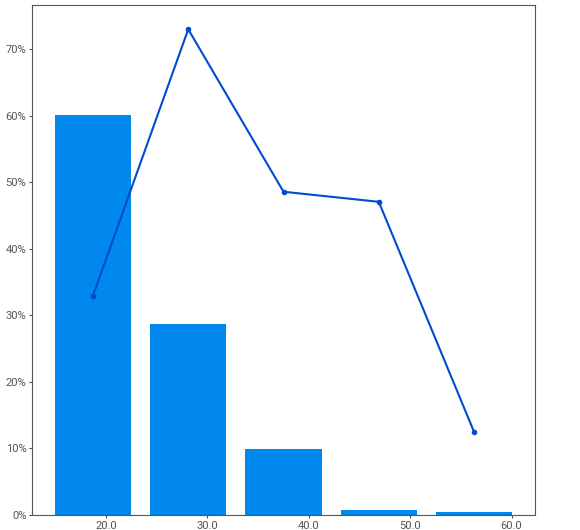
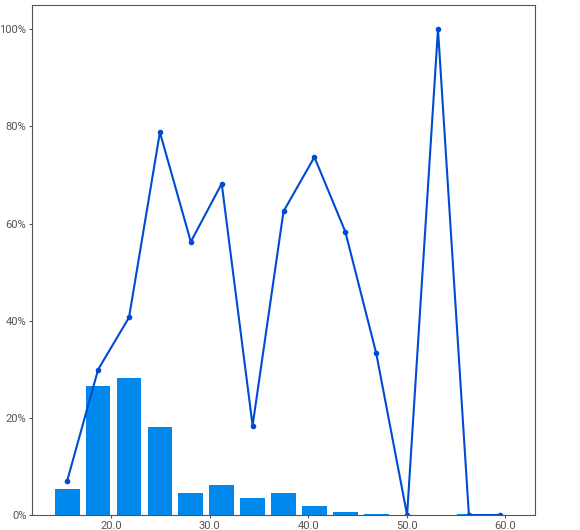
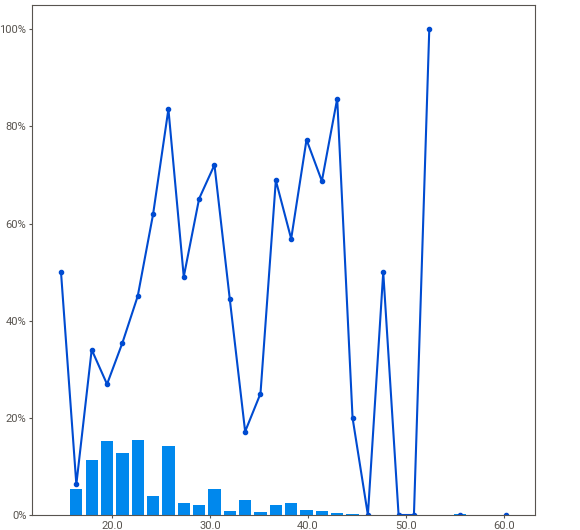
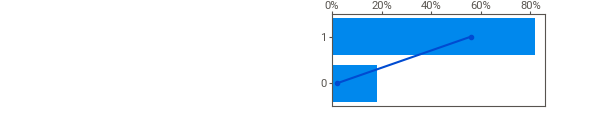
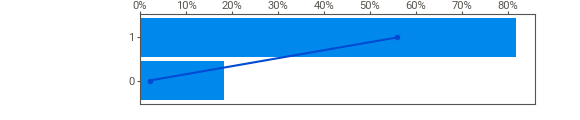
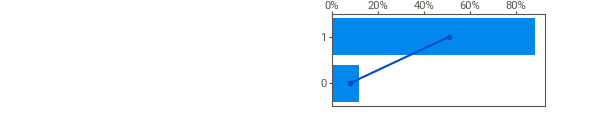
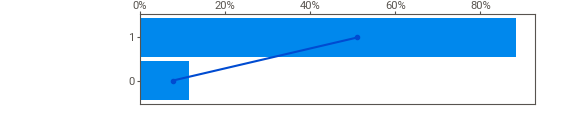
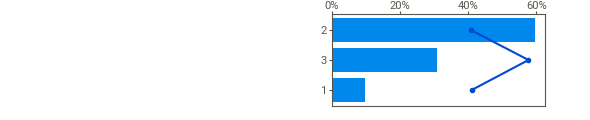
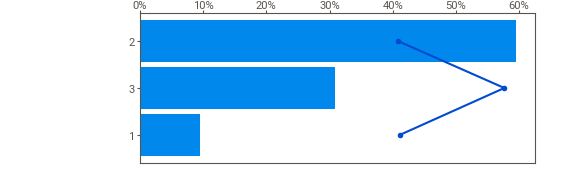
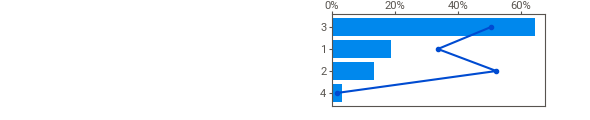
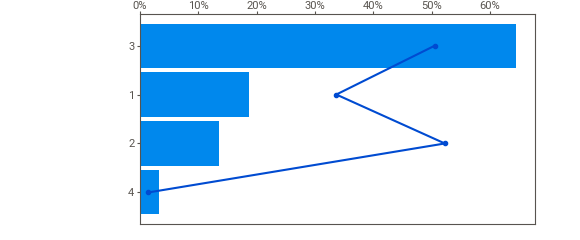
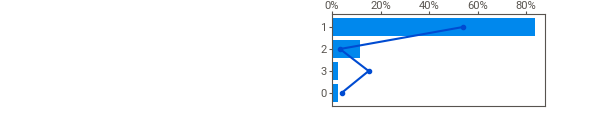
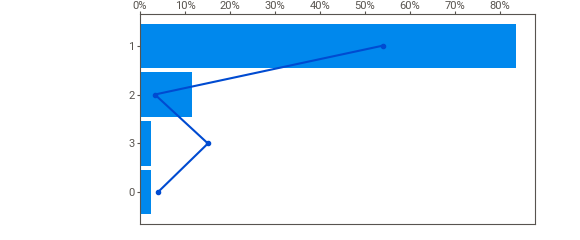
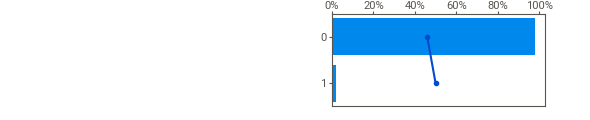
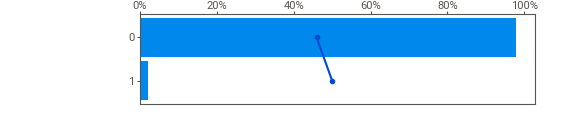
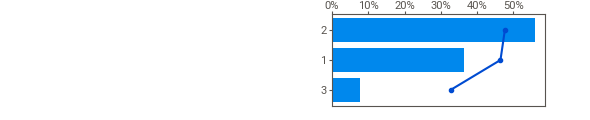
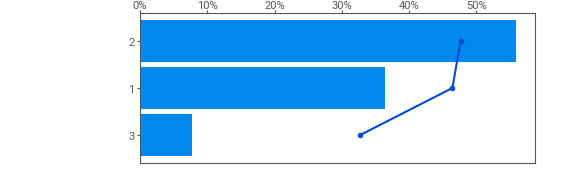
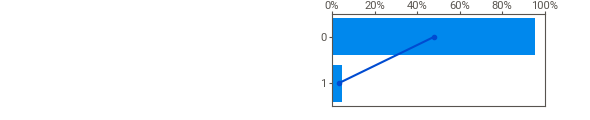
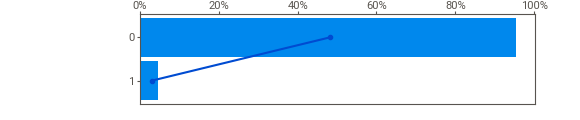
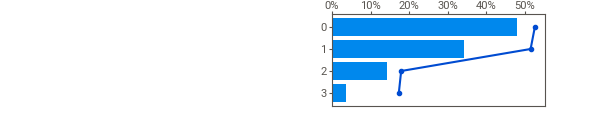
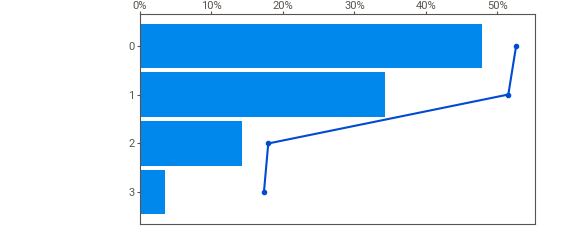
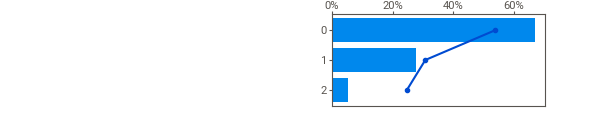
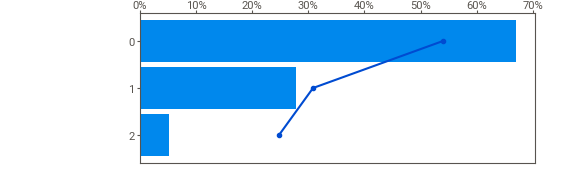
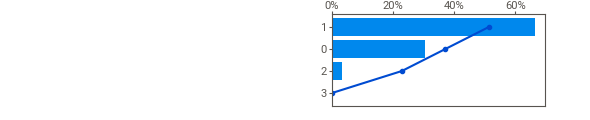
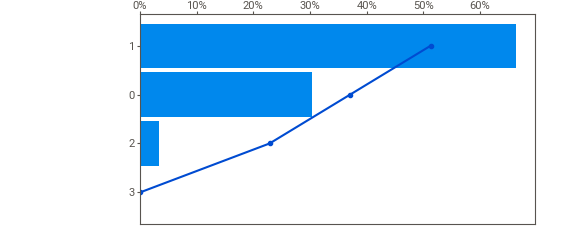
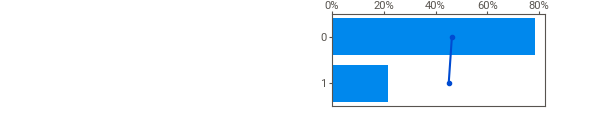
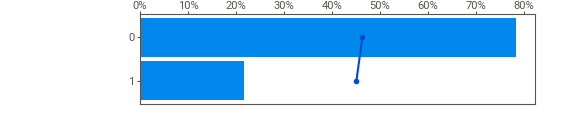
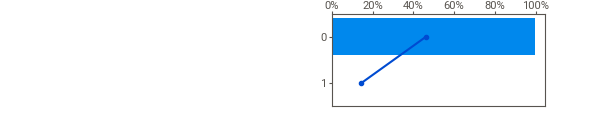
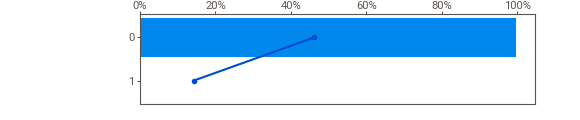
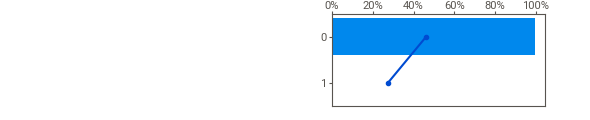
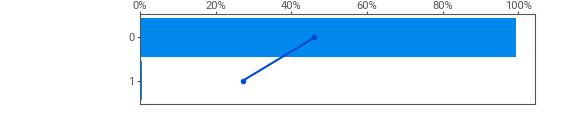
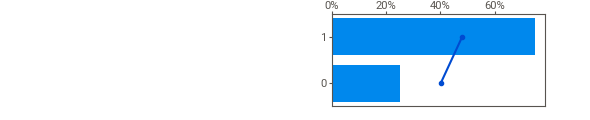
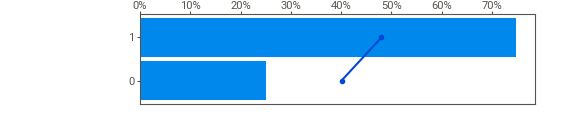
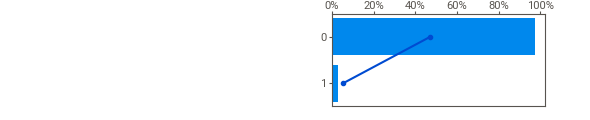
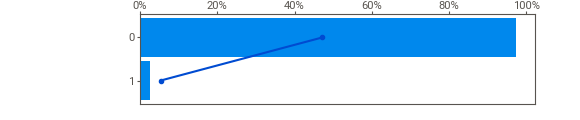
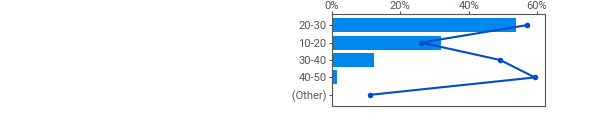
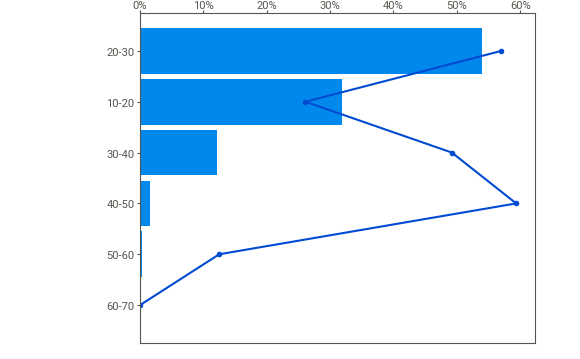
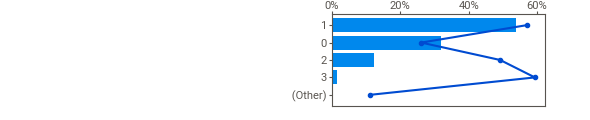
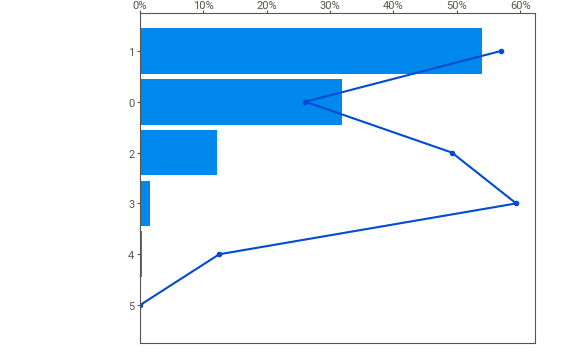
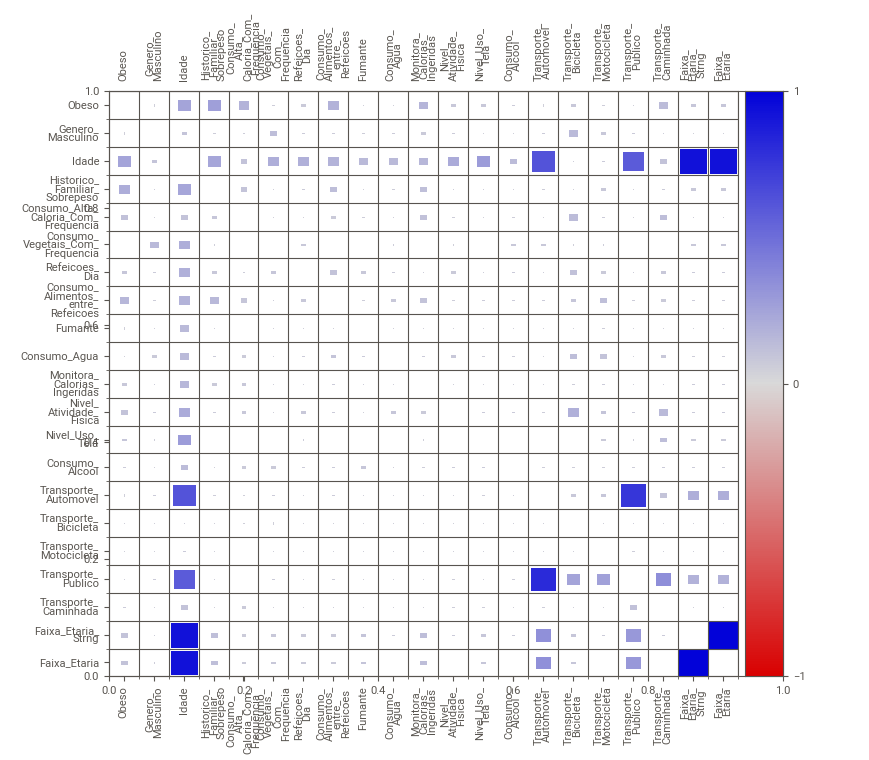
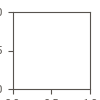

In [62]:
sv_obsidade_report.show_notebook()

In [63]:
X = df_obesiddade.drop(columns=['Obeso', 'Idade', 'Faixa_Etaria_Strng'], axis=1)
y = df_obesiddade['Obeso']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51, shuffle=True)

In [64]:
model_base_line = GaussianNB()
model_base_line.fit(X_train, y_train)

GaussianNB()

In [65]:
y_pred = model_base_line.predict(X_test)

In [66]:
classification_report_str = classification_report(y_test, y_pred)
recall_baseline = recall_score(y_test, y_pred, average='macro')
print(f'relatório classificação:\n{classification_report_str}')
print(f'Recall:\n{recall_baseline}')

relatório classificação:
              precision    recall  f1-score   support

           0       0.94      0.60      0.73       339
           1       0.67      0.96      0.79       295

    accuracy                           0.76       634
   macro avg       0.81      0.78      0.76       634
weighted avg       0.82      0.76      0.76       634

Recall:
0.775901204939753


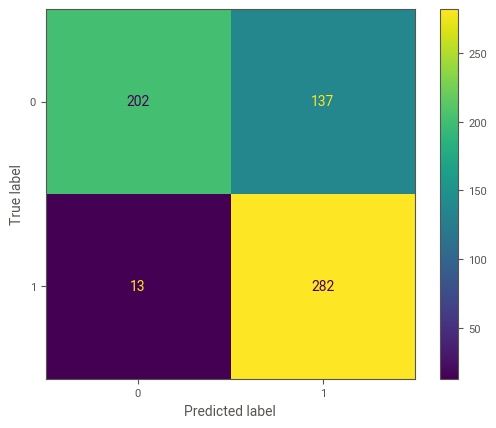

In [67]:
confusion_matrix_modelo_baseline =confusion_matrix(y_test, y_pred)
disp_modelo_baseline = ConfusionMatrixDisplay(confusion_matrix_modelo_baseline)
disp_modelo_baseline.plot()

In [88]:
# automated feature selection seleciona melhores features treinar modelo
# seleciona as k melhores fetures de um teste

k_best = SelectKBest(score_func=chi2, k=8)



In [89]:
k_best

SelectKBest(k=8, score_func=<function chi2 at 0x7d276ddcd1c0>)

In [90]:
X_train_kbest = k_best.fit_transform(X_train, y_train)


In [91]:
X_train_kbest

array([[0, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 0, 2],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 2],
       [1, 1, 3, ..., 1, 0, 1],
       [1, 1, 1, ..., 0, 0, 1]])

In [92]:
k_best_features = k_best.get_support(indices=True)
X_train_kbest_features = X_train.iloc[:, k_best_features]
X_train_kbest_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1477 entries, 301 to 2105
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Historico_Familiar_Sobrepeso         1477 non-null   int64   
 1   Consumo_Alta_Caloria_Com_Frequencia  1477 non-null   int64   
 2   Consumo_Alimentos_entre_Refeicoes    1477 non-null   int64   
 3   Monitora_Calorias_Ingeridas          1477 non-null   int64   
 4   Nivel_Atividade_Fisica               1477 non-null   int64   
 5   Nivel_Uso_Tela                       1477 non-null   int64   
 6   Transporte_Caminhada                 1477 non-null   int64   
 7   Faixa_Etaria                         1477 non-null   category
dtypes: category(1), int64(7)
memory usage: 94.0 KB


In [93]:
modelo_kbest = GaussianNB()
modelo_kbest.fit(X_train_kbest_features, y_train)


GaussianNB()

In [94]:
X_test_kbest = k_best.transform(X_test)
X_test_best_features = X_test.iloc[:, k_best_features]


In [95]:
y_pred_kbest = modelo_kbest.predict(X_test_best_features)

In [96]:
classification_report_str = classification_report(y_test, y_pred_kbest)
recall_baseline = recall_score(y_test, y_pred_kbest, average='macro')
print(f'relatório kbest{classification_report_str}')
print(f'recall (Kbest):\n{recall_baseline}')

relatório kbest              precision    recall  f1-score   support

           0       0.94      0.61      0.74       339
           1       0.68      0.95      0.79       295

    accuracy                           0.77       634
   macro avg       0.81      0.78      0.76       634
weighted avg       0.82      0.77      0.76       634

recall (Kbest):
0.780105994700265


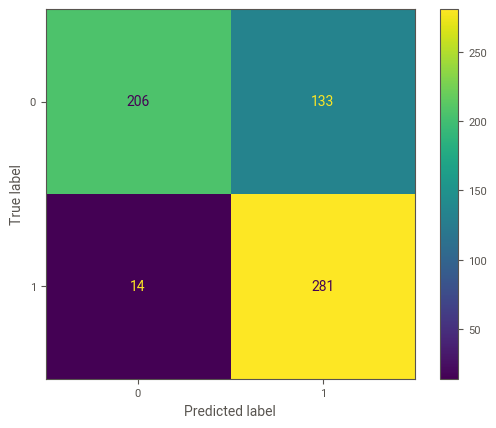

In [97]:
confusion_matrix_modelo_kbest =confusion_matrix(y_test, y_pred_kbest)
disp_modelo_kbest = ConfusionMatrixDisplay(confusion_matrix_modelo_kbest)
disp_modelo_kbest.plot()

In [84]:
# tuning hiperparametros do selectkbest
# k  = k melhores features conforme chi2

def naivebayes_opotuna(trial):
    k = trial.suggest_int('k', 1, 18)
    k_best = SelectKBest(score_func=chi2, k=k)
    X_train_kbest = k_best.fit_transform(X_train, y_train)
    kbest_features = k_best.get_support(indices=True)
    X_train_best_features = X_train.iloc[:, kbest_features]
    # treinar modelo com mnelhores features
    model_kbest_optuna = GaussianNB()
    model_kbest_optuna.fit(X_train_best_features, y_train)
    # aplicar o seletor de features no conjunto de teste
    X_test_kbest = k_best.transform(X_test)
    X_test_best_features = X_test.iloc[:, kbest_features]
    # predizer valores
    y_pred_kbest = model_kbest_optuna.predict(X_test_best_features)
    # avaliar recall
    recall_optuna = recall_score(y_test, y_pred_kbest, average='macro')
    return k, recall_optuna


In [85]:
# rodar estudo hiperparametros
search_space = {'k': range(1,19)}
estudo_naivebayes = optuna.create_study(sampler=optuna.samplers.GridSampler(search_space=search_space), directions=['minimize', 'maximize'])
estudo_naivebayes.optimize(naivebayes_opotuna, n_trials=50)

[I 2024-03-12 12:44:56,452] A new study created in memory with name: no-name-de965e69-c6d3-4dde-abeb-6a8b217ebd7c
[I 2024-03-12 12:44:56,466] Trial 0 finished with values: [7.0, 0.748537573121344] and parameters: {'k': 7}. 
[I 2024-03-12 12:44:56,482] Trial 1 finished with values: [4.0, 0.6952202389880506] and parameters: {'k': 4}. 
[I 2024-03-12 12:44:56,498] Trial 2 finished with values: [16.0, 0.7742062896855157] and parameters: {'k': 16}. 
[I 2024-03-12 12:44:56,513] Trial 3 finished with values: [18.0, 0.775901204939753] and parameters: {'k': 18}. 
[I 2024-03-12 12:44:56,524] Trial 4 finished with values: [5.0, 0.6950002499875007] and parameters: {'k': 5}. 
[I 2024-03-12 12:44:56,538] Trial 5 finished with values: [6.0, 0.7030348482575871] and parameters: {'k': 6}. 
[I 2024-03-12 12:44:56,550] Trial 6 finished with values: [11.0, 0.7727313634318285] and parameters: {'k': 11}. 
[I 2024-03-12 12:44:56,562] Trial 7 finished with values: [12.0, 0.7727313634318285] and parameters: {'k'

In [86]:
# mostrar melhor resultado
trial_com_melhor_recall = max(estudo_naivebayes.best_trials, key=lambda t:t.values[1])
print("Trial com maior recall e menor k: ")
print(f'\ttrial number: {trial_com_melhor_recall.number}')
print(f'\tparam: {trial_com_melhor_recall.params}')
print(f'\tvalues (k, recall): {trial_com_melhor_recall.values}')

Trial com maior recall e menor k: 
	trial number: 8
	param: {'k': 8}
	values (k, recall): [8.0, 0.780105994700265]


In [87]:
# mostar chart com trials 
fig = optuna.visualization.plot_pareto_front(estudo_naivebayes)
fig.show()

In [98]:
import joblib
joblib.dump(modelo_kbest, 'modelo.pkl')

['modelo.pkl']